<a href="https://colab.research.google.com/github/cheth-dev/Mainflow_internship/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("/content/customers.csv")


df = df.drop(columns=['CustomerID'])




In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Convert Gender to numerical values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Rename columns for consistency
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)
# Selecting relevant features for clustering
features = ['Gender', 'Age', 'Annual Income', 'Spending Score']
X = df[features]

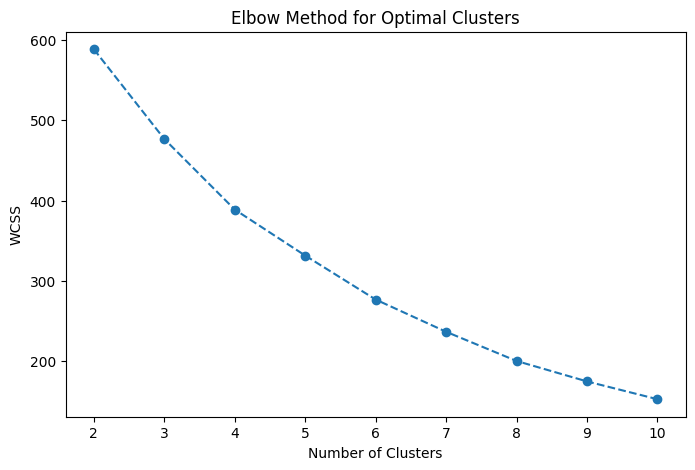

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine optimal number of clusters using Elbow Method
wcss = []
k_range = range(2, 11)  # Checking clusters from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [ ]:
# Step 3: Evaluate using Silhouette Score
silhouette_scores = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Step 3: Apply K-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Optimal number of clusters based on silhouette score: 10


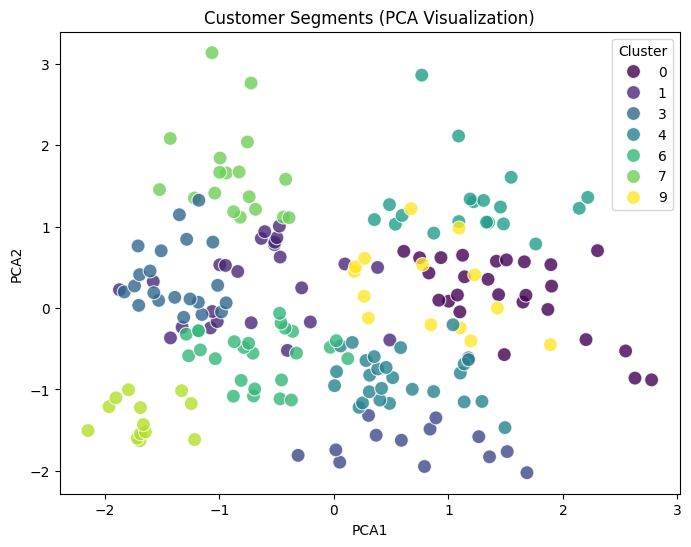

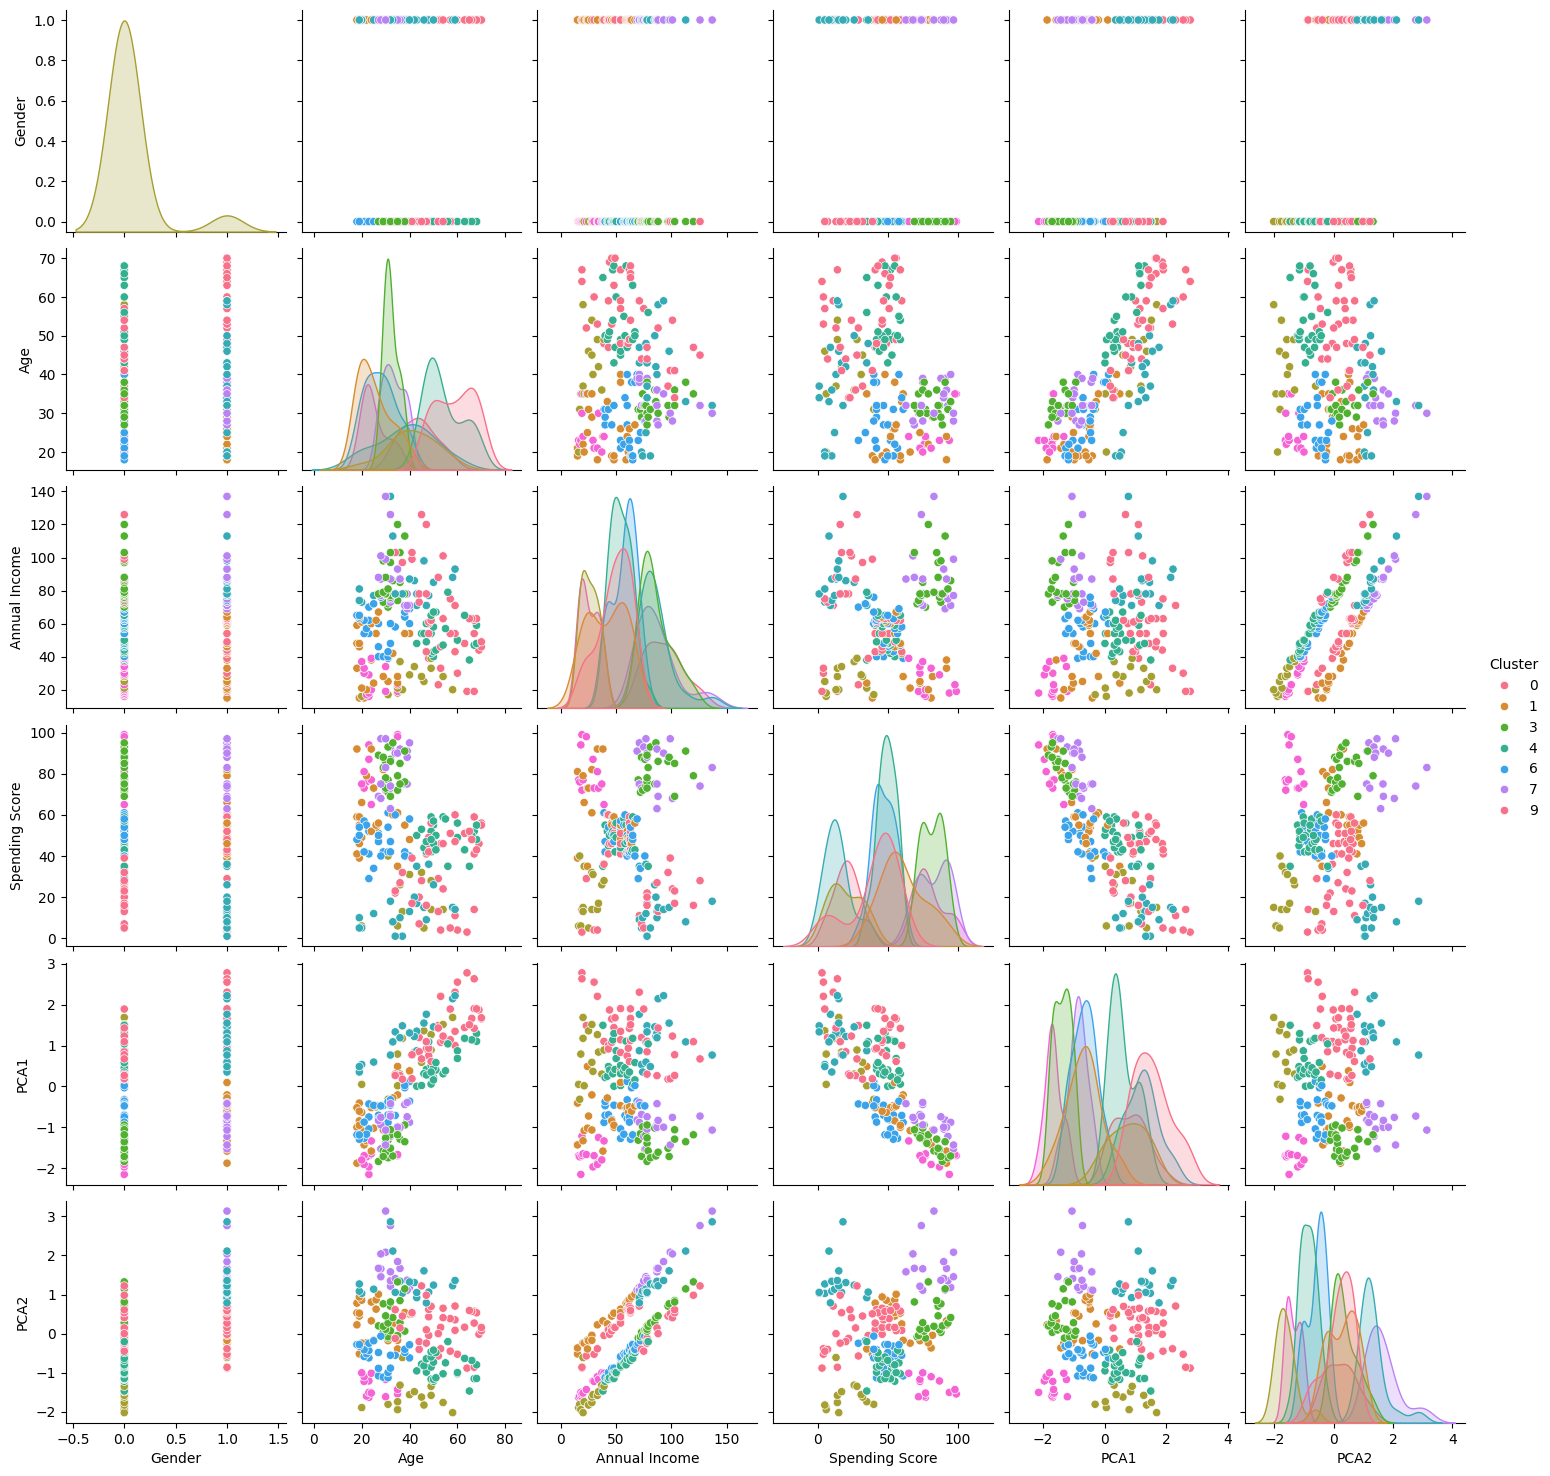

In [ ]:

# Step 4: Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title("Customer Segments (PCA Visualization)")
plt.show()

# Step 4: Pair Plot to see relationships between features
sns.pairplot(df, hue='Cluster', palette='husl')
plt.show()

# Save the clustered dataset
df.to_csv("customer_data_clustered.csv", index=False)